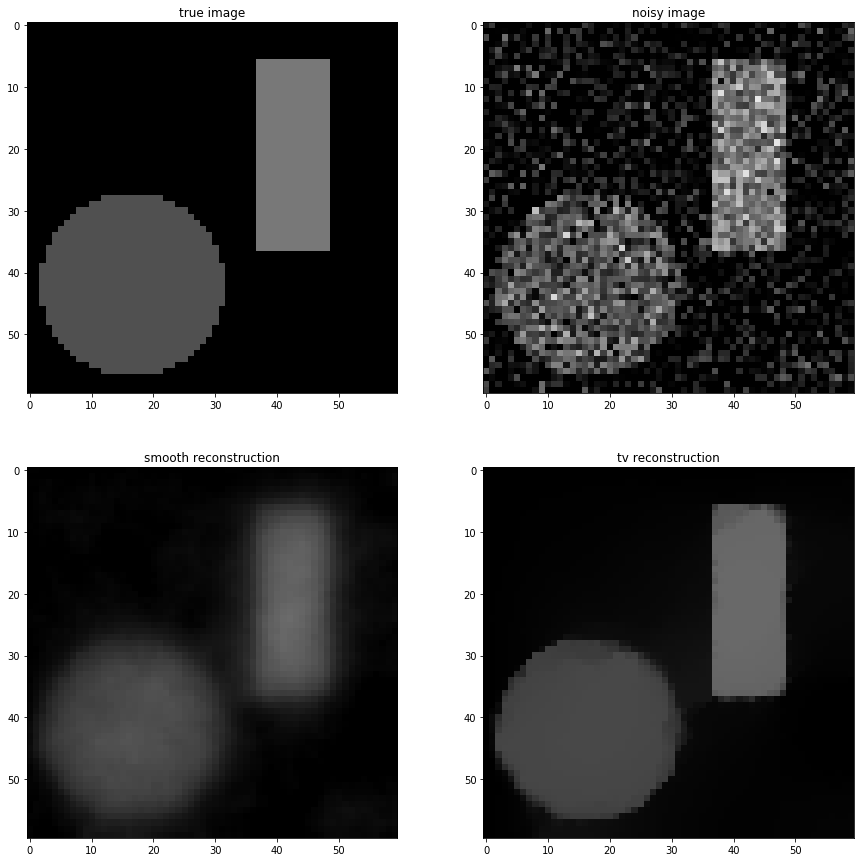

In [5]:
%matplotlib inline

import numpy as np
import scipy.linalg
import scipy.sparse.linalg
import scipy.misc
import scipy.optimize
import scipy.sparse as sparse
import matplotlib.pyplot as plt


alpha = 3e-3;  # regularization parameter for \|grad u\|_{L^2}^2 penalty
beta = 1.5;   # regularization parameter for |u|_TV penalty


# create a test image
n=30
x=np.arange(-n,n)/n
y=x
[Y,X]=np.meshgrid(x,y)
im=np.zeros(X.shape)
im[(X-0.4)**2+(Y+0.45)**2<=0.5**2]= 80
im[((abs(X+0.3)<=0.5 ) & (abs(Y-0.4)<0.2))]=120


# add noise
[ny,nx] = im.shape
gdelta = im*1.0 + 40*np.random.randn(nx,ny)

def imageSobReg(im,alpha):
     # create matrix dx approximating partial derivative w.r.t. x 
    # by forward finite differences
    aux_dx = nx*np.stack((-np.ones(nx),np.ones(nx)),axis=0)
    dx = sparse.kron(sparse.spdiags(aux_dx,[0, 1],nx,nx),sparse.eye(ny))
    # create matrix dy approximating partial derivative w.r.t. y
    # by forward finite differences
    aux_dy = ny*np.stack((-np.ones(ny),np.ones(ny)),axis=0)
    dy = sparse.kron(sparse.eye(nx),sparse.spdiags(aux_dy,[0, 1],ny,ny))
    # matrix approximating the divergence operator
    Div =sparse.hstack([dx,dy])


    # note that Div*Div'  = - Div*Grad = - Laplace 
    rec_Sobo = sparse.linalg.spsolve((sparse.eye(nx*ny)+ alpha*Div@Div.transpose()),gdelta.ravel())
    return np.reshape(rec_Sobo,(ny,nx))


def imageTvReg(im,beta):
     # create matrix dx approximating partial derivative w.r.t. x 
    # by forward finite differences
    aux_dx = nx*np.stack((-np.ones(nx),np.ones(nx)),axis=0)
    dx = sparse.kron(sparse.spdiags(aux_dx,[0, 1],nx,nx),sparse.eye(ny))
    # create matrix dy approximating partial derivative w.r.t. y
    # by forward finite differences
    aux_dy = ny*np.stack((-np.ones(ny),np.ones(ny)),axis=0)
    dy = sparse.kron(sparse.eye(nx),sparse.spdiags(aux_dy,[0, 1],ny,ny))
    # matrix approximating the divergence operator
    Div =sparse.hstack([dx,dy])
    # determine stepsize
    ev_max=(sparse.linalg.eigsh(Div.transpose()@Div,1,return_eigenvectors=False))
    tau=1./(ev_max+1)
    # initialize
    p=np.zeros(2*nx*ny)
    k_max=500
    step=np.zeros(k_max)
    # Chambolle Algorithm
    for k in range(k_max):
        inter=-Div.transpose()@(Div@p+gdelta.ravel())
        internorm=np.array([(inter[0:nx*ny]**2+inter[nx*ny:]**2)**0.5,(inter[0:nx*ny]**2+inter[nx*ny:]**2)**0.5]).ravel()
        pnew=(p+tau*inter)/(1+(tau/beta)*internorm)
        step[k]=np.linalg.norm(p-pnew)
        p=pnew
    rec_tv = Div@p+gdelta.ravel()
    rec_tv = np.reshape(rec_tv,(ny,nx))
    return rec_tv
    





plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray',vmin=0, vmax=255)
plt.title('true image')

plt.subplot(2,2,2)
plt.imshow(gdelta, cmap='gray',vmin=0, vmax=255)
plt.title('noisy image')

plt.subplot(2,2,3)
plt.imshow(imageSobReg(gdelta,alpha), cmap='gray',vmin=0, vmax=255)
plt.title('smooth reconstruction')

plt.subplot(2,2,4)
plt.imshow(imageTvReg(gdelta,beta), cmap='gray',vmin=0, vmax=255)
plt.title('tv reconstruction')
plt.show()

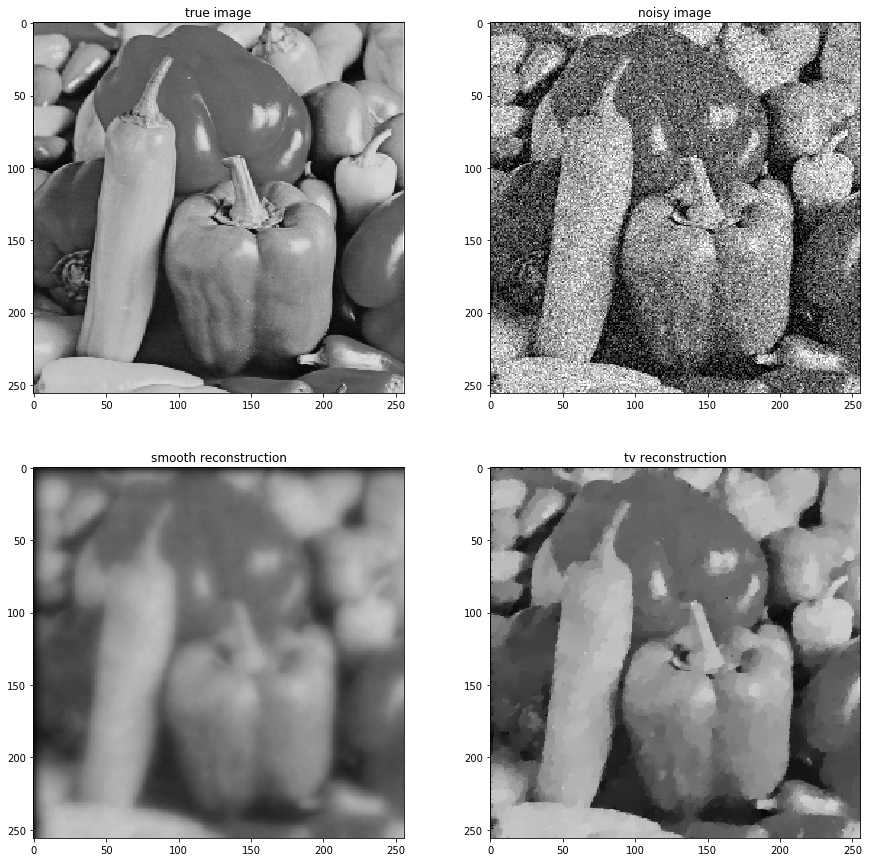

In [6]:
alpha = 3e-4;  # regularization parameter for \|grad u\|_{L^2}^2 penalty
beta = 1.5e-1;   # regularization parameter for |u|_TV penalty
#im = scipy.misc.imread('house.png')
im = scipy.misc.imread('peppers.png')
#im = scipy.misc.imread('boat.png')
#im = scipy.misc.imread('lena.png')
#im = scipy.misc.imread('barbara.png')

# add noise
[ny,nx] = im.shape
gdelta = im*1.0 + 40*np.random.randn(nx,ny)
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray',vmin=0, vmax=255)
plt.title('true image')

plt.subplot(2,2,2)
plt.imshow(gdelta, cmap='gray',vmin=0, vmax=255)
plt.title('noisy image')

plt.subplot(2,2,3)
plt.imshow(imageSobReg(gdelta,alpha), cmap='gray',vmin=0, vmax=255)
plt.title('smooth reconstruction')

plt.subplot(2,2,4)
plt.imshow(imageTvReg(gdelta,beta), cmap='gray',vmin=0, vmax=255)
plt.title('tv reconstruction')
plt.show()

In [14]:
alpha = 2e-4;  # regularization parameter for \|grad u\|_{L^2}^2 penalty
beta = 1.8e-1;   # regularization parameter for |u|_TV penalty
im = scipy.misc.imread('house.png')
#im = scipy.misc.imread('peppers.png')
#im = scipy.misc.imread('boat.png')
#im = scipy.misc.imread('lena.png')
#im = scipy.misc.imread('barbara.png')

# add noise
[ny,nx] = im.shape
gdelta = im*1.0 + 40*np.random.randn(nx,ny)
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray',vmin=0, vmax=255)
plt.title('true image')

plt.subplot(2,2,2)
plt.imshow(gdelta, cmap='gray',vmin=0, vmax=255)
plt.title('noisy image')

plt.subplot(2,2,3)
plt.imshow(imageSobReg(gdelta,alpha), cmap='gray',vmin=0, vmax=255)
plt.title('smooth reconstruction')

plt.subplot(2,2,4)
plt.imshow(imageTvReg(gdelta,beta), cmap='gray',vmin=0, vmax=255)
plt.title('tv reconstruction')
plt.show()

In [18]:
alpha = 0.5e-4;  # regularization parameter for \|grad u\|_{L^2}^2 penalty
beta = 6e-2;   # regularization parameter for |u|_TV penalty
#im = scipy.misc.imread('house.png')
#im = scipy.misc.imread('peppers.png')
im = scipy.misc.imread('boat.png')
#im = scipy.misc.imread('lena.png')
#im = scipy.misc.imread('barbara.png')

# add noise
[ny,nx] = im.shape
gdelta = im*1.0 + 40*np.random.randn(nx,ny)
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(im, cmap='gray',vmin=0, vmax=255)
plt.title('true image')

plt.subplot(2,2,2)
plt.imshow(gdelta, cmap='gray',vmin=0, vmax=255)
plt.title('noisy image')

plt.subplot(2,2,3)
plt.imshow(imageSobReg(gdelta,alpha), cmap='gray',vmin=0, vmax=255)
plt.title('smooth reconstruction')

plt.subplot(2,2,4)
plt.imshow(imageTvReg(gdelta,beta), cmap='gray',vmin=0, vmax=255)
plt.title('tv reconstruction')
plt.show()